## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
del application_df['EIN']
del application_df['NAME']

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
application_df["APPLICATION_TYPE"].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
application_index=application_df["APPLICATION_TYPE"].value_counts()

In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace= application_index[application_index < 500].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# You may find it helpful to look at CLASSIFICATION value counts
classification_index = application_df["CLASSIFICATION"].value_counts()
classification_index

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C8210        1
C4500        1
C2570        1
C1732        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
classifications_to_replace= classification_index[classification_index < 800].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [19]:
ask_amount_counts = application_df["ASK_AMT"].value_counts()
ask_amount_counts

5000       25398
10478          3
15583          3
6725           3
63981          3
           ...  
772556         1
70103          1
27096          1
25049          1
1138700        1
Name: ASK_AMT, Length: 8747, dtype: int64

<AxesSubplot:ylabel='Density'>

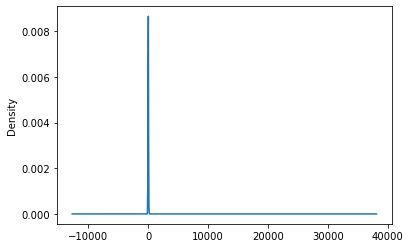

In [20]:
ask_amount_counts.plot.density()

In [21]:
# Determine which values to replace if counts are less than ...?
replace_ask_amount = list(ask_amount_counts[ask_amount_counts < 1000].index)

# Replace in dataframe
for amount in replace_ask_amount:
    if amount <= 49999:
        application_df["ASK_AMT"] =  application_df["ASK_AMT"].replace(amount,str("5001-49999"))
    elif amount < 99999:
         application_df["ASK_AMT"] =  application_df["ASK_AMT"].replace(amount,str("50000-99999"))
    elif amount < 499999:
         application_df["ASK_AMT"] =  application_df["ASK_AMT"].replace(amount,str("100000-499999"))
    elif amount < 999999:
         application_df["ASK_AMT"] =  application_df["ASK_AMT"].replace(amount,str("500000-999999"))
    elif amount < 4999999:
         application_df["ASK_AMT"] =  application_df["ASK_AMT"].replace(amount,str("1M-5M"))
    else:
         application_df["ASK_AMT"] =  application_df["ASK_AMT"].replace(amount,str("5M+"))
    
application_df["ASK_AMT"] =  application_df["ASK_AMT"].astype(str)

# Check to make sure binning was successful
application_df["ASK_AMT"].value_counts()

5000             25398
5001-49999        2947
100000-499999     2305
50000-99999       1421
1M-5M              940
500000-999999      651
5M+                637
Name: ASK_AMT, dtype: int64

In [22]:
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['ASK_AMT']

In [23]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

ASK_AMT_100000-499999  ASK_AMT_1M-5M  ASK_AMT_5000  ASK_AMT_50000-99999  \
0                    0.0            0.0           1.0                  0.0   
1                    1.0            0.0           0.0                  0.0   
2                    0.0            0.0           1.0                  0.0   
3                    0.0            0.0           0.0                  0.0   
4                    1.0            0.0           0.0                  0.0   

   ASK_AMT_500000-999999  ASK_AMT_5001-49999  ASK_AMT_5M+  
0                    0.0                 0.0          0.0  
1                    0.0                 0.0          0.0  
2                    0.0                 0.0          0.0  
3                    0.0                 1.0          0.0  
4                    0.0                 0.0          0.0

In [24]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

STATUS  IS_SUCCESSFUL  APPLICATION_TYPE_Other  APPLICATION_TYPE_T10  \
0       1              1                     0.0                   1.0   
1       1              1                     0.0                   0.0   
2       1              0                     0.0                   0.0   
3       1              1                     0.0                   0.0   
4       1              1                     0.0                   0.0   

   APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  \
0                   0.0                  0.0                  0.0   
1                   0.0                  1.0                  0.0   
2                   0.0                  0.0                  0.0   
3                   0.0                  1.0                  0.0   
4                   0.0                  1.0                  0.0   

   APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  APPLICATION_TYPE_T7  ...  \
0                  0.0                  0.0                  0.0  ...   
1                  0.0                  0.0                  0.0  ...   
2                  1.0                  0.0                  0.0  ...   
3                  0.0                  0.0                  0.0  ...   
4                  0.0                  0.0                  0.0  ...   

   INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  SPECIAL_CONSIDERATIONS_Y  \
0                0.0                       1.0                       0.0   
1                0.0                       1.0                       0.0   
2                0.0                       1.0                       0.0   
3                0.0                       1.0                       0.0   
4                0.0                       1.0                       0.0   

   ASK_AMT_100000-499999  ASK_AMT_1M-5M  ASK_AMT_5000  ASK_AMT_50000-99999  \
0                    0.0            0.0           1.0                  0.0   
1                    1.0            0.0           0.0                  0.0   
2                    0.0            0.0           1.0                  0.0   
3                    0.0            0.0           0.0                  0.0   
4                    1.0            0.0           0.0                  0.0   

   ASK_AMT_500000-999999  ASK_AMT_5001-49999  ASK_AMT_5M+  
0                    0.0                 0.0          0.0  
1                    0.0                 0.0          0.0  
2                    0.0                 0.0          0.0  
3                    0.0                 1.0          0.0  
4                    0.0                 0.0          0.0  

[5 rows x 50 columns]

In [25]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [26]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

###  Attempt #1

In [27]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 70
hidden_nodes_layer3 = 40

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               5000      
_________________________________________________________________
dense_5 (Dense)              (None, 70)                7070      
_________________________________________________________________
dense_6 (Dense)              (None, 40)                2840      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 41        
Total params: 14,951
Trainable params: 14,951
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compile the model
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_attempt1/",exist_ok=True)
checkpoint_path = "checkpoints_attempt1/weights.{epoch:02d}.hdf5"
# Create a callback which saves the weights for every 5 epochs
save_callback = ModelCheckpoint(checkpoint_path, 
                                     save_weights_only=True, save_freq=5)


# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])


In [29]:
# Train the model
fit_model= nn.fit(X_train_scaled, y_train, epochs=100, verbose=1, callbacks=[save_callback])

Epoch 1/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5692 - accuracy: 0.7215
Epoch 2/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5537 - accuracy: 0.7302
Epoch 3/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5495 - accuracy: 0.7318
Epoch 4/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5479 - accuracy: 0.7346
Epoch 5/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5462 - accuracy: 0.7344
Epoch 6/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5449 - accuracy: 0.7360
Epoch 7/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5443 - accuracy: 0.7364
Epoch 8/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5432 - accuracy: 0.7360
Epoch 9/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5421 - accuracy: 0.7376
Epoch 10/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5418 - accura

804/804 [==============================] - 3s 3ms/step - loss: 0.5220 - accuracy: 0.7463
Epoch 82/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5222 - accuracy: 0.7471
Epoch 83/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5225 - accuracy: 0.7465
Epoch 84/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5217 - accuracy: 0.7475
Epoch 85/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5221 - accuracy: 0.7468
Epoch 86/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5218 - accuracy: 0.7456
Epoch 87/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5220 - accuracy: 0.7459
Epoch 88/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5216 - accuracy: 0.7460
Epoch 89/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5219 - accuracy: 0.7474
Epoch 90/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5217 - accuracy: 

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5935 - accuracy: 0.7265
Loss: 0.5935084223747253, Accuracy: 0.7265306115150452


### Attempt #2

In [31]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
nodes_hidden_layer1 = 80
nodes_hidden_layer2 = 40

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer1, activation="tanh", input_dim=number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer2, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 80)                4000      
_________________________________________________________________
dense_9 (Dense)              (None, 40)                3240      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 41        
Total params: 7,281
Trainable params: 7,281
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Compile the model
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_attempt2/",exist_ok=True)
checkpoint_path = "checkpoints_attempt2/weights.{epoch:02d}.hdf5"
# Create a callback which saves the weights for every 5 epochs
save_callback = ModelCheckpoint(checkpoint_path, 
                                     save_weights_only=True, save_freq=5)


# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

In [33]:
# Train the model
fit_model= nn.fit(X_train_scaled, y_train, epochs=100, verbose=1, callbacks=[save_callback])

Epoch 1/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5724 - accuracy: 0.7195
Epoch 2/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5570 - accuracy: 0.7277
Epoch 3/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5520 - accuracy: 0.7304
Epoch 4/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5492 - accuracy: 0.7338
Epoch 5/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5472 - accuracy: 0.7334
Epoch 6/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5459 - accuracy: 0.7357
Epoch 7/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5448 - accuracy: 0.7336
Epoch 8/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5442 - accuracy: 0.7361
Epoch 9/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5433 - accuracy: 0.7360
Epoch 10/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5422 - accura

804/804 [==============================] - 2s 3ms/step - loss: 0.5231 - accuracy: 0.7458
Epoch 82/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5233 - accuracy: 0.7453
Epoch 83/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5233 - accuracy: 0.7468
Epoch 84/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5232 - accuracy: 0.7451
Epoch 85/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5231 - accuracy: 0.7465
Epoch 86/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5230 - accuracy: 0.7455
Epoch 87/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5230 - accuracy: 0.7468
Epoch 88/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5229 - accuracy: 0.7461
Epoch 89/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5228 - accuracy: 0.7456
Epoch 90/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5227 - accuracy: 

In [34]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5598 - accuracy: 0.7254
Loss: 0.5597781538963318, Accuracy: 0.7253644466400146


### Attempt #3

In [35]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
nodes_hidden_layer1 = 70
nodes_hidden_layer2 = 40
nodes_hidden_layer3 = 10


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer1, activation="tanh", input_dim=number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer3, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 70)                3500      
_________________________________________________________________
dense_12 (Dense)             (None, 40)                2840      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                410       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 6,761
Trainable params: 6,761
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Compile the model
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_attempt3/",exist_ok=True)
checkpoint_path = "checkpoints_attempt3/weights.{epoch:02d}.hdf5"
# Create a callback which saves the weights for every 5 epochs
save_callback = ModelCheckpoint(checkpoint_path, 
                                     save_weights_only=True, save_freq=5)


# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

In [37]:
# Train the model
fit_model= nn.fit(X_train_scaled, y_train, epochs=50, verbose=1, callbacks=[save_callback])

Epoch 1/50
804/804 [==============================] - 4s 4ms/step - loss: 0.5717 - accuracy: 0.7200
Epoch 2/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5549 - accuracy: 0.7290
Epoch 3/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5504 - accuracy: 0.7317
Epoch 4/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5484 - accuracy: 0.7320
Epoch 5/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5467 - accuracy: 0.7328
Epoch 6/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5451 - accuracy: 0.7327
Epoch 7/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5437 - accuracy: 0.7346
Epoch 8/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5428 - accuracy: 0.7369
Epoch 9/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5418 - accuracy: 0.7375
Epoch 10/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5413 - accuracy: 0.7360

In [38]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5551 - accuracy: 0.7266
Loss: 0.5551111698150635, Accuracy: 0.7266472578048706


In [39]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")